In [ ]:
%load_ext autoreload
%autoreload 2

import sys, os
import numpy as np
import pandas as pd
from data import get_data
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Mean
from nn_plotting import plot_loss_history
from sklearn.metrics import accuracy_score
from utils import save_nn_output_to_midi, now

In [2]:
train_songs, X_train, test_songs, X_test, y_train, y_test, vocab_size = get_data()

In [3]:
num_train = X_train.shape[0]
num_test = X_test.shape[0]
timesteps = X_train.shape[1]

In [4]:
learning_rate = 5e-3
epochs = 1
batch_size = 32

In [17]:
from models.ae.autoencoders import RNNAE

encoder_hidden_units = 256
decoder_hidden_units = 256

rnn_ae = RNNAE(encoder_hidden_units, decoder_hidden_units, timesteps, vocab_size)

ModuleNotFoundError: No module named 'models'

In [96]:
rnn_ae.name

'RNNEncoderRNNDecoder'

In [97]:
name = f"{rnn_ae.encoder.name}_{rnn_ae.decoder.name}"


mc = ModelCheckpoint(f'Models/{name}.hdf5', monitor='val_loss')

optimizer = Adam(learning_rate=learning_rate)

rnn_ae.compile(optimizer, loss='categorical_crossentropy')

In [98]:
name

'LSTM_Encoder_LSTM_Decoder'

In [10]:
hist = rnn_ae.fit(X_train, y_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_test, y_test),
                callbacks=[mc])

97/97 [==============================] - 9s 24ms/step - loss: 2.2234 - val_loss: 1.9494


In [11]:
rnn_ae.sample(10, X_train, 2).shape

Fitting GMM to distribution of encoding.
(256,)


(10, 64)

In [12]:
rnn_ae.summary()

Model: "RNNEncoderRNNDecoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LSTM_Encoder (RNNEncoder)    multiple                  297152    
_________________________________________________________________
LSTM_Decoder (RNNDecoder)    multiple                  535078    
Total params: 832,230
Trainable params: 832,230
Non-trainable params: 0
_________________________________________________________________


In [15]:
from models.autoencoders import RNNEncoderCNNDecoder

encoder_hidden_units = (512, 256, 128)
decoder_filter_sizes = (64, 32)

rnne_cnnd = RNNEncoderCNNDecoder(encoder_hidden_units, decoder_filter_sizes, timesteps=timesteps, vocab_size=vocab_size)

In [16]:
name = f"{rnne_cnnd.encoder.name}_{rnne_cnnd.decoder.name}"
learning_rate = 5e-3
epochs = 100
batch_size = 32

mc = ModelCheckpoint(f'Models/{name}.hdf5', monitor='val_loss')

optimizer = Adam(learning_rate=learning_rate)

rnne_cnnd.compile(optimizer, loss='categorical_crossentropy')

In [17]:
hist = rnne_cnnd.fit(X_train, y_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_test, y_test),
                callbacks=[mc])

Epoch 1/100
97/97 [==============================] - 7s 34ms/step - loss: 3.3571 - val_loss: 2.0136
Epoch 2/100
97/97 [==============================] - 2s 23ms/step - loss: 1.9917 - val_loss: 1.9437
Epoch 3/100
97/97 [==============================] - 2s 23ms/step - loss: 1.9618 - val_loss: 1.9418
Epoch 4/100
97/97 [==============================] - 2s 23ms/step - loss: 1.9720 - val_loss: 1.9408
Epoch 5/100
97/97 [==============================] - 2s 23ms/step - loss: 1.9618 - val_loss: 1.9425
Epoch 6/100
97/97 [==============================] - 2s 23ms/step - loss: 1.9783 - val_loss: 1.9398
Epoch 7/100
97/97 [==============================] - 2s 24ms/step - loss: 1.9563 - val_loss: 1.9405
Epoch 8/100
97/97 [==============================] - 2s 24ms/step - loss: 1.9717 - val_loss: 1.9384
Epoch 9/100
97/97 [==============================] - 2s 23ms/step - loss: 1.9609 - val_loss: 1.9347
Epoch 10/100
97/97 [==============================] - 2s 23ms/step - loss: 1.9577 - val_loss: 1.9290

In [18]:
rnne_cnnd.sample(10, X_train, 2)

Fitting GMM to distribution of encoding.
(128,)


array([[ 0, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37],
       [ 0, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37],
       [ 0, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37],
       [ 0, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 3

In [9]:
from models.autoencoders import CNNAE

encoder_filter_sizes = (16, 8)
decoder_filter_sizes = (8, 16)

cnn_ae = CNNAE(encoder_filter_sizes, decoder_filter_sizes, vocab_size)

In [10]:
name = f"{cnn_ae.encoder.name}_{cnn_ae.decoder.name}"
learning_rate = 5e-3
epochs = 1
batch_size = 32

mc = ModelCheckpoint(f'Models/{name}.hdf5', monitor='val_loss')

optimizer = Adam(learning_rate=learning_rate)

cnn_ae.compile(optimizer, loss='categorical_crossentropy')

In [11]:
hist = cnn_ae.fit(X_train, y_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_test, y_test),
                callbacks=[mc])

97/97 [==============================] - 3s 13ms/step - loss: 2.9897 - val_loss: 1.7859


In [12]:
cnn_ae.sample(10, X_train, 2)

Fitting GMM to distribution of encoding.
(16, 8)


array([[37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37],
       [37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37],
       [37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37],
       [37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
        37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 3

In [13]:
from models.autoencoders import CNNEncoderRNNDecoder

encoder_filter_sizes = (16, 8)
decoder_hidden_units = 256

cnne_rnnd = CNNEncoderRNNDecoder(encoder_filter_sizes, decoder_hidden_units, timesteps, vocab_size)

In [14]:
name = f"{cnne_rnnd.encoder.name}_{cnne_rnnd.decoder.name}"
learning_rate = 5e-3
epochs = 1
batch_size = 32

mc = ModelCheckpoint(f'Models/{name}.hdf5', monitor='val_loss')

optimizer = Adam(learning_rate=learning_rate)

cnne_rnnd.compile(optimizer, loss='categorical_crossentropy')

In [15]:
hist = cnne_rnnd.fit(X_train, y_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_test, y_test),
                callbacks=[mc])

ValueError: in user code:

    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:756 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:1537 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/keras/backend.py:4833 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /kuacc/users/udemir15/.local/lib/python3.7/site-packages/tensorflow/python/framework/tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 64, 38) and (None, 16, 38) are incompatible


In [417]:
from keras_models.vae.variationalautoencoders import DenseVAE

encoder_intermediate_dims = (256, 128, 64)
latent_dim = 64
decoder_intermediate_dims = encoder_intermediate_dims[::-1]

dense_vae = DenseVAE(encoder_intermediate_dims, latent_dim, decoder_intermediate_dims, vocab_size, embed_size=32)

In [418]:
name = f"{dense_vae.encoder.name}_{dense_vae.decoder.name}_{now()}"
learning_rate = 5e-3
epochs = 50
batch_size = 32

In [419]:
saved_weights = f'keras_weights/{now()}_{name}.h5'
mc = ModelCheckpoint(saved_weights, monitor='val_loss', save_weights_only=True)
es = EarlyStopping(patience=10, restore_best_weights=True)

optimizer = Adam(learning_rate=learning_rate)

In [420]:
dense_vae.compile(optimizer=optimizer)

In [421]:
hist = dense_vae.fit(X_train, X_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_test, X_test),
                callbacks=[mc, es]
                    )

Epoch 1/50
111/111 [==============================] - 3s 10ms/step - loss: 150.1580 - reconstruction_loss: 131.5843 - kl_loss: 0.8647 - val_loss: 108.5947 - val_reconstruction_loss: 107.1730 - val_kl_loss: 1.4217
Epoch 2/50
111/111 [==============================] - 1s 7ms/step - loss: 98.0396 - reconstruction_loss: 87.2038 - kl_loss: 2.7023 - val_loss: 74.4175 - val_reconstruction_loss: 70.1364 - val_kl_loss: 4.2811
Epoch 3/50
111/111 [==============================] - 1s 7ms/step - loss: 70.4630 - reconstruction_loss: 63.4064 - kl_loss: 4.9111 - val_loss: 64.6572 - val_reconstruction_loss: 59.0052 - val_kl_loss: 5.6520
Epoch 4/50
111/111 [==============================] - 1s 7ms/step - loss: 60.1516 - reconstruction_loss: 53.1808 - kl_loss: 5.8828 - val_loss: 57.3505 - val_reconstruction_loss: 50.7366 - val_kl_loss: 6.6138
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 53.8709 - reconstruction_loss: 46.9041 - kl_loss: 6.4619 - val_loss: 54.0563 - val_recons

In [422]:
dense_vae.summary()

Model: "DenseVAE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
DenseEncoder (DenseEncoder)  multiple                  574848    
_________________________________________________________________
DenseDecoder (DenseDecoder)  multiple                  314266    
Total params: 889,120
Trainable params: 889,114
Non-trainable params: 6
_________________________________________________________________


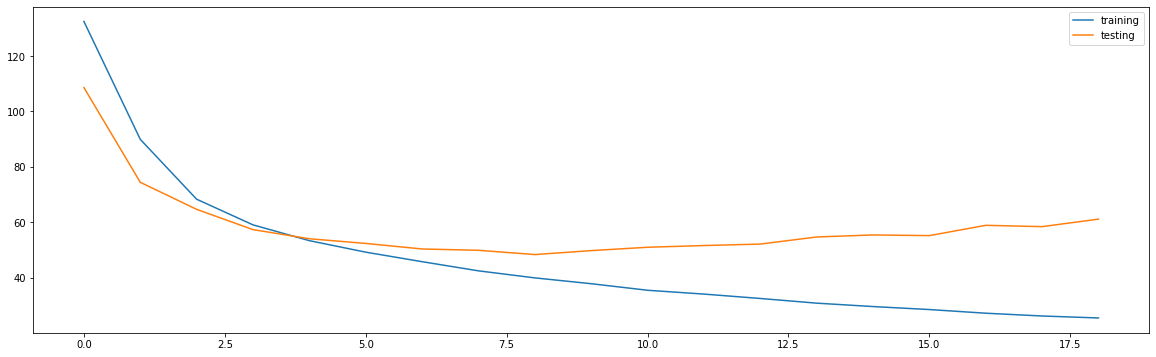

In [423]:
plot_loss_history(hist)

In [424]:
(dense_vae(X_train[:4,:]).numpy().argmax(-1) != X_train[:4,:]).sum()

54

In [425]:
samples = dense_vae.sample(10)

samples

array([[ 0, 25, 25, 25, 17, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         0, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,  2, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 14, 25, 25, 25, 25],
       [ 0, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 17,
        25, 25, 25, 25, 25, 25, 25,  2, 25, 17, 25, 25, 25, 25, 25,  2,
        25, 25, 25, 25, 25, 25,  0, 25, 25, 25, 25, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 17, 25, 25, 25, 25, 25, 25, 25, 25, 25],
       [ 0, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,  0, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 25,  0, 25, 25, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 17, 25, 25],
       [ 0, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         0, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 2

In [398]:
save_nn_output_to_midi(samples, name)

In [10]:
from tensorflow.keras.models import load_model

In [19]:
dense_vae.load_weights(f'/kuacc/users/udemir15/Bassline-Generator/generator/keras_weights/{name}.h5')

In [169]:
s = dense_vae.sample(1).reshape(-1)

comparison = np.array([accuracy_score(x, s) for x in X_train])

In [170]:
comparison.max()

0.4375

In [171]:
print_beat_matrix(s, 8, SIL=0, SUS=25)

NameError: name 'print_beat_matrix' is not defined

In [24]:
print_transposed_beat_matrix(s, 8, SIL=0, SUS=25)

SIL: 0, SUS: 25

       Beat 0           Beat 1       
Bar 0: [ 0 25 25  9]   [25  9 25  8]
Bar 1: [0 9 8 0]   [25  9 25  9]
Bar 2: [25  9  9  9]   [21 25  0 21]
Bar 3: [25  9  9  9]   [9 9 8 9]

       Beat 2           Beat 3       
Bar 0: [ 0 10  0  9]   [25  9 25  9]
Bar 1: [ 9  9 17  7]   [25 10  0  9]
Bar 2: [ 9 11  0  9]   [25 17 11 12]
Bar 3: [9 8 9 8]   [25  8  0 12]


In [64]:
from sklearn.metrics import accuracy_score

accuracy_score(X_train.reshape(-1), dense_vae(X_train).numpy().argmax(-1).reshape(-1))

0.9856962316176471

In [221]:
from keras_models.vae.variationalautoencoders import RNNVAE

encoder_hidden_units = (256, 128)
last_dense_dim = 64
latent_dim = 64
decoder_hidden_units = encoder_hidden_units[::-1]

rnn_vae = RNNVAE(encoder_hidden_units, last_dense_dim, latent_dim, decoder_hidden_units, timesteps, vocab_size, embed_size=32)

In [222]:
name = f"{rnn_vae.encoder.name}_{rnn_vae.decoder.name}_{now()}"
learning_rate = 5e-3
epochs = 1000
batch_size = 32

mc = ModelCheckpoint(f'keras_weights/{name}.h5', monitor='val_loss')

optimizer = Adam(learning_rate=learning_rate)

In [223]:
rnn_vae.compile(optimizer=optimizer)

In [224]:
hist = rnn_vae.fit(X_train, X_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_test, X_test),
                callbacks=[mc])

Epoch 1/1000
111/111 [==============================] - 9s 33ms/step - loss: 145.2954 - reconstruction_loss: 133.1578 - kl_loss: 0.5450 - val_loss: 125.2342 - val_reconstruction_loss: 124.8376 - val_kl_loss: 0.3966
Epoch 2/1000
111/111 [==============================] - 3s 28ms/step - loss: 124.8532 - reconstruction_loss: 122.7653 - kl_loss: 0.5889 - val_loss: 126.8762 - val_reconstruction_loss: 125.6987 - val_kl_loss: 1.1776
Epoch 3/1000
111/111 [==============================] - 2s 22ms/step - loss: 120.8020 - reconstruction_loss: 118.6369 - kl_loss: 0.6243 - val_loss: 118.0452 - val_reconstruction_loss: 117.5595 - val_kl_loss: 0.4856
Epoch 4/1000
111/111 [==============================] - 2s 21ms/step - loss: 117.3806 - reconstruction_loss: 117.6928 - kl_loss: 0.9239 - val_loss: 118.0723 - val_reconstruction_loss: 116.9844 - val_kl_loss: 1.0878
Epoch 5/1000
111/111 [==============================] - 2s 22ms/step - loss: 117.8264 - reconstruction_loss: 116.6447 - kl_loss: 0.8089 - va

111/111 [==============================] - 2s 18ms/step - loss: 98.7810 - reconstruction_loss: 97.4157 - kl_loss: 1.2498 - val_loss: 102.4686 - val_reconstruction_loss: 101.2211 - val_kl_loss: 1.2475
Epoch 40/1000
111/111 [==============================] - 2s 20ms/step - loss: 97.6443 - reconstruction_loss: 97.1941 - kl_loss: 1.3138 - val_loss: 102.1631 - val_reconstruction_loss: 100.9265 - val_kl_loss: 1.2367
Epoch 41/1000
111/111 [==============================] - 2s 19ms/step - loss: 98.2229 - reconstruction_loss: 96.9306 - kl_loss: 1.3243 - val_loss: 101.8941 - val_reconstruction_loss: 100.7023 - val_kl_loss: 1.1918
Epoch 42/1000
111/111 [==============================] - 2s 22ms/step - loss: 97.4631 - reconstruction_loss: 96.6660 - kl_loss: 1.3150 - val_loss: 102.0284 - val_reconstruction_loss: 100.7001 - val_kl_loss: 1.3283
Epoch 43/1000
111/111 [==============================] - 3s 24ms/step - loss: 97.4860 - reconstruction_loss: 96.3326 - kl_loss: 1.3514 - val_loss: 101.5436 - 

111/111 [==============================] - 2s 17ms/step - loss: 80.7950 - reconstruction_loss: 78.6263 - kl_loss: 2.2108 - val_loss: 101.6074 - val_reconstruction_loss: 99.3979 - val_kl_loss: 2.2094
Epoch 116/1000
111/111 [==============================] - 2s 17ms/step - loss: 79.5112 - reconstruction_loss: 77.4281 - kl_loss: 2.2604 - val_loss: 102.6738 - val_reconstruction_loss: 100.3856 - val_kl_loss: 2.2882
Epoch 117/1000
111/111 [==============================] - 2s 19ms/step - loss: 79.2351 - reconstruction_loss: 77.2767 - kl_loss: 2.3190 - val_loss: 102.9054 - val_reconstruction_loss: 100.6382 - val_kl_loss: 2.2672
Epoch 118/1000
111/111 [==============================] - 2s 18ms/step - loss: 79.5805 - reconstruction_loss: 76.9842 - kl_loss: 2.3212 - val_loss: 104.0684 - val_reconstruction_loss: 101.7235 - val_kl_loss: 2.3449
Epoch 119/1000
111/111 [==============================] - 2s 20ms/step - loss: 80.2505 - reconstruction_loss: 77.2551 - kl_loss: 2.3564 - val_loss: 102.8271

111/111 [==============================] - 2s 20ms/step - loss: 94.0958 - reconstruction_loss: 92.2057 - kl_loss: 1.5393 - val_loss: 98.0534 - val_reconstruction_loss: 96.6230 - val_kl_loss: 1.4304
Epoch 192/1000
111/111 [==============================] - 2s 20ms/step - loss: 110.2501 - reconstruction_loss: 114.1228 - kl_loss: 12.5992 - val_loss: 123.5590 - val_reconstruction_loss: 117.8829 - val_kl_loss: 5.6761
Epoch 193/1000
111/111 [==============================] - 2s 20ms/step - loss: 119.7698 - reconstruction_loss: 112.8447 - kl_loss: 3.5479 - val_loss: 110.8268 - val_reconstruction_loss: 108.3082 - val_kl_loss: 2.5185
Epoch 194/1000
111/111 [==============================] - 2s 20ms/step - loss: 110.0643 - reconstruction_loss: 106.4210 - kl_loss: 2.1878 - val_loss: 106.2942 - val_reconstruction_loss: 104.4530 - val_kl_loss: 1.8412
Epoch 195/1000
111/111 [==============================] - 2s 19ms/step - loss: 105.0603 - reconstruction_loss: 102.8626 - kl_loss: 1.6972 - val_loss: 

111/111 [==============================] - 2s 19ms/step - loss: 116.6286 - reconstruction_loss: 114.0661 - kl_loss: 1.9573 - val_loss: 115.3013 - val_reconstruction_loss: 113.0660 - val_kl_loss: 2.2353
Epoch 268/1000
111/111 [==============================] - 3s 23ms/step - loss: 113.3083 - reconstruction_loss: 110.3902 - kl_loss: 1.6688 - val_loss: 110.9459 - val_reconstruction_loss: 109.5138 - val_kl_loss: 1.4321
Epoch 269/1000
111/111 [==============================] - 2s 21ms/step - loss: 109.4654 - reconstruction_loss: 107.9233 - kl_loss: 1.3918 - val_loss: 108.7775 - val_reconstruction_loss: 107.4926 - val_kl_loss: 1.2850
Epoch 270/1000
111/111 [==============================] - 2s 19ms/step - loss: 108.0893 - reconstruction_loss: 106.4158 - kl_loss: 1.3299 - val_loss: 107.6136 - val_reconstruction_loss: 106.3111 - val_kl_loss: 1.3025
Epoch 271/1000
111/111 [==============================] - 2s 20ms/step - loss: 107.2067 - reconstruction_loss: 105.3479 - kl_loss: 1.3708 - val_los

111/111 [==============================] - 2s 20ms/step - loss: 112.8185 - reconstruction_loss: 103.3306 - kl_loss: 2.6000 - val_loss: 104.2162 - val_reconstruction_loss: 102.4070 - val_kl_loss: 1.8092
Epoch 344/1000
111/111 [==============================] - 2s 19ms/step - loss: 95.0840 - reconstruction_loss: 91.5522 - kl_loss: 1.9619 - val_loss: 103.1463 - val_reconstruction_loss: 101.0436 - val_kl_loss: 2.1027
Epoch 345/1000
111/111 [==============================] - 2s 19ms/step - loss: 90.0207 - reconstruction_loss: 86.9223 - kl_loss: 2.1837 - val_loss: 102.2305 - val_reconstruction_loss: 100.0178 - val_kl_loss: 2.2127
Epoch 346/1000
111/111 [==============================] - 2s 17ms/step - loss: 85.5199 - reconstruction_loss: 82.5766 - kl_loss: 2.3432 - val_loss: 104.7258 - val_reconstruction_loss: 102.3282 - val_kl_loss: 2.3976
Epoch 347/1000
111/111 [==============================] - 2s 17ms/step - loss: 105.5407 - reconstruction_loss: 110.2223 - kl_loss: 8.1117 - val_loss: 118

111/111 [==============================] - 2s 19ms/step - loss: 73.0040 - reconstruction_loss: 71.1083 - kl_loss: 2.8627 - val_loss: 109.7438 - val_reconstruction_loss: 107.0494 - val_kl_loss: 2.6944
Epoch 420/1000
111/111 [==============================] - 2s 18ms/step - loss: 73.1616 - reconstruction_loss: 70.1209 - kl_loss: 2.8619 - val_loss: 111.9443 - val_reconstruction_loss: 108.9788 - val_kl_loss: 2.9655
Epoch 421/1000
111/111 [==============================] - 2s 19ms/step - loss: 71.5876 - reconstruction_loss: 68.9577 - kl_loss: 2.9208 - val_loss: 110.5594 - val_reconstruction_loss: 107.6516 - val_kl_loss: 2.9078
Epoch 422/1000
111/111 [==============================] - 2s 18ms/step - loss: 71.3417 - reconstruction_loss: 74.9685 - kl_loss: 3.7581 - val_loss: 148.7545 - val_reconstruction_loss: 129.1980 - val_kl_loss: 19.5566
Epoch 423/1000
111/111 [==============================] - 2s 17ms/step - loss: 121.2505 - reconstruction_loss: 105.4703 - kl_loss: 5.2242 - val_loss: 102.

111/111 [==============================] - 2s 19ms/step - loss: 1437.3106 - reconstruction_loss: 138.1829 - kl_loss: 1283.8219 - val_loss: 1408.6012 - val_reconstruction_loss: 134.9503 - val_kl_loss: 1273.6508
Epoch 494/1000
111/111 [==============================] - 2s 21ms/step - loss: 1395.9133 - reconstruction_loss: 134.4092 - kl_loss: 1240.1373 - val_loss: 1248.7266 - val_reconstruction_loss: 135.2906 - val_kl_loss: 1113.4362
Epoch 495/1000
111/111 [==============================] - 2s 19ms/step - loss: 128522639253.9440 - reconstruction_loss: 259.2481 - kl_loss: 329054420992.0000 - val_loss: 151864590336.0000 - val_reconstruction_loss: 251.2307 - val_kl_loss: 151864590336.0000
Epoch 496/1000
111/111 [==============================] - 2s 17ms/step - loss: 232757509046.8571 - reconstruction_loss: 203.3487 - kl_loss: 303521628160.0000 - val_loss: 4568360960.0000 - val_reconstruction_loss: 230.5953 - val_kl_loss: 4568360448.0000
Epoch 497/1000
111/111 [==============================]

111/111 [==============================] - 2s 18ms/step - loss: 65232.5695 - reconstruction_loss: 129.7350 - kl_loss: 65054.3906 - val_loss: 65781.2812 - val_reconstruction_loss: 129.1841 - val_kl_loss: 65652.0859
Epoch 563/1000
111/111 [==============================] - 2s 20ms/step - loss: 64863.2214 - reconstruction_loss: 129.5549 - kl_loss: 65105.5078 - val_loss: 65687.7734 - val_reconstruction_loss: 129.1334 - val_kl_loss: 65558.6562
Epoch 564/1000
111/111 [==============================] - 2s 21ms/step - loss: 65857.0492 - reconstruction_loss: 129.6045 - kl_loss: 64989.4609 - val_loss: 65428.5352 - val_reconstruction_loss: 129.2087 - val_kl_loss: 65299.3242
Epoch 565/1000
111/111 [==============================] - 2s 19ms/step - loss: 63670.8758 - reconstruction_loss: 129.6930 - kl_loss: 63752.9883 - val_loss: 64326.8438 - val_reconstruction_loss: 129.3720 - val_kl_loss: 64197.4609
Epoch 566/1000
111/111 [==============================] - 2s 19ms/step - loss: 62055.4316 - reconst

Epoch 597/1000
111/111 [==============================] - 2s 18ms/step - loss: 1244548.7768 - reconstruction_loss: 130.4147 - kl_loss: 1240755.0000 - val_loss: 1250945.0000 - val_reconstruction_loss: 129.8387 - val_kl_loss: 1250815.0000
Epoch 598/1000
111/111 [==============================] - 2s 22ms/step - loss: 1232600.9621 - reconstruction_loss: 130.2530 - kl_loss: 1249031.7500 - val_loss: 1208328.6250 - val_reconstruction_loss: 130.0373 - val_kl_loss: 1208198.6250
Epoch 599/1000
111/111 [==============================] - 3s 23ms/step - loss: 1191789.3588 - reconstruction_loss: 130.3112 - kl_loss: 1241482.3750 - val_loss: 1310816.2500 - val_reconstruction_loss: 129.8182 - val_kl_loss: 1310686.3750
Epoch 600/1000
111/111 [==============================] - 3s 23ms/step - loss: 1236115.2645 - reconstruction_loss: 130.1887 - kl_loss: 1099853.8750 - val_loss: 1226979.7500 - val_reconstruction_loss: 129.8853 - val_kl_loss: 1226849.7500
Epoch 601/1000
111/111 [============================

111/111 [==============================] - 2s 20ms/step - loss: 9085.9481 - reconstruction_loss: 129.4294 - kl_loss: 9441.7129 - val_loss: 9660.2949 - val_reconstruction_loss: 129.4812 - val_kl_loss: 9530.8135
Epoch 668/1000
111/111 [==============================] - 3s 23ms/step - loss: 8016.3274 - reconstruction_loss: 129.5417 - kl_loss: 5793.5688 - val_loss: 4044.7903 - val_reconstruction_loss: 129.5270 - val_kl_loss: 3915.2634
Epoch 669/1000
111/111 [==============================] - 3s 25ms/step - loss: 4001.1147 - reconstruction_loss: 129.3596 - kl_loss: 3887.4653 - val_loss: 4087.0701 - val_reconstruction_loss: 128.8333 - val_kl_loss: 3958.2363
Epoch 670/1000
111/111 [==============================] - 2s 23ms/step - loss: 3971.7896 - reconstruction_loss: 129.2644 - kl_loss: 3782.0349 - val_loss: 3717.8147 - val_reconstruction_loss: 128.9785 - val_kl_loss: 3588.8362
Epoch 671/1000
111/111 [==============================] - 2s 20ms/step - loss: 4371.7198 - reconstruction_loss: 129

111/111 [==============================] - 2s 21ms/step - loss: 2615.5668 - reconstruction_loss: 129.1672 - kl_loss: 2497.1633 - val_loss: 2580.3047 - val_reconstruction_loss: 128.7368 - val_kl_loss: 2451.5684
Epoch 740/1000
111/111 [==============================] - 2s 20ms/step - loss: 2576.9305 - reconstruction_loss: 128.9616 - kl_loss: 2653.8206 - val_loss: 3005.5962 - val_reconstruction_loss: 128.6244 - val_kl_loss: 2876.9719
Epoch 741/1000
111/111 [==============================] - 2s 22ms/step - loss: 3196.6467 - reconstruction_loss: 129.1459 - kl_loss: 3302.6736 - val_loss: 3732.6785 - val_reconstruction_loss: 129.0987 - val_kl_loss: 3603.5803
Epoch 742/1000
111/111 [==============================] - 2s 19ms/step - loss: 3686.3666 - reconstruction_loss: 129.3237 - kl_loss: 3394.8496 - val_loss: 2325.2168 - val_reconstruction_loss: 130.8233 - val_kl_loss: 2194.3936
Epoch 743/1000
111/111 [==============================] - 2s 21ms/step - loss: 2537.7273 - reconstruction_loss: 129

KeyboardInterrupt: 

In [212]:
rnn_vae.summary()

Model: "RNNVAE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LSTM_Encoder (RNNEncoder)    multiple                  1019456   
_________________________________________________________________
LSTM_Decoder (RNNDecoder)    multiple                  1057306   
Total params: 2,076,768
Trainable params: 2,076,762
Non-trainable params: 6
_________________________________________________________________


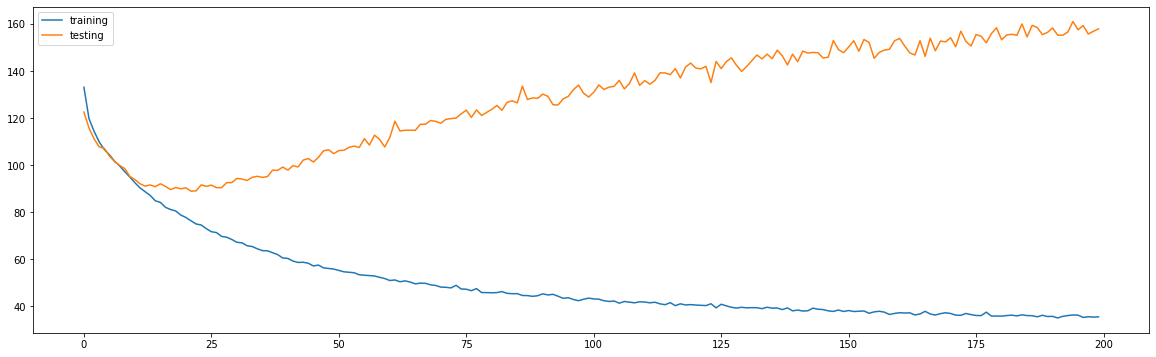

In [225]:
from plotting import plot_loss_history

plot_loss_history(hist)

In [226]:
rnn_vae.sample()

array([[ 0, 25,  0, 25, 25,  0, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
        25, 25,  0,  0, 25, 25,  0, 25, 25, 25,  0, 25, 25,  0,  0, 25,
        25, 25, 25, 25, 25,  0, 25, 25,  0, 25,  0, 25, 25, 25,  0, 25],
       [ 0, 25,  0, 25, 25,  0, 25, 25, 25, 25, 25,  0, 25,  0, 25, 25,
         0, 25, 25,  0, 25,  0, 25, 25, 25, 25,  0, 25, 25,  0, 25,  0,
         0, 25,  0, 25, 25, 25, 25,  0,  0,  0, 25, 25,  0, 25, 25,  0,
        25, 25, 25, 25,  0, 25, 25, 25, 25,  0, 25, 25, 25, 25,  0,  0],
       [ 0, 25, 25, 25, 25,  0,  0, 25, 25, 25, 25,  0,  0, 25, 25, 25,
         0, 25, 25,  0,  0, 25, 25,  0, 25, 25, 25,  0, 25, 25,  0,  0,
         0,  0, 25, 25, 25, 25,  0,  0, 25,  0, 25, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 25,  0,  0, 25, 25, 25,  0,  0,  0, 25,  0,  0],
       [ 0, 25,  0, 25, 25, 25,  0, 25, 25, 25, 25, 25, 25,  0, 25, 25,
         0, 25, 25, 25, 25, 25,  0, 25, 25, 25, 25, 25, 25, 2

In [90]:
from sklearn.metrics import accuracy_score

accuracy_score(X_train.reshape(-1), rnn_vae(X_train).numpy().argmax(-1).reshape(-1))

NameError: name 'rnn_vae' is not defined

In [12]:
from keras_models.vae.variationalautoencoders import CNNVAE

encoder_filter_sizes = (128, 64, 32)
encoder_dilation_rates = 1
latent_dim = 32
decoder_filter_sizes = encoder_filter_sizes[::-1]
decoder_dilation_rates = 1
decoder_dense_unit = latent_dim


cnn_vae = CNNVAE(encoder_filter_sizes, latent_dim, decoder_filter_sizes, decoder_dense_unit, timesteps, vocab_size, embed_size=16)

In [13]:
name = f"{cnn_vae.encoder.name}_{cnn_vae.decoder.name}_{now()}"
learning_rate = 5e-3
epochs = 200
batch_size = 32

mc = ModelCheckpoint(f'keras_weights/{name}.h5', monitor='val_loss')
es = EarlyStopping(patience=10, restore_best_weights=True)

optimizer = Adam(learning_rate=learning_rate)

In [14]:
cnn_vae.compile(optimizer=optimizer)

In [16]:
0 == 0.

True

In [15]:
hist = cnn_vae.fit(X_train, X_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_test, X_test),
                callbacks=[mc, es]
                  )

Epoch 1/200
111/111 [==============================] - 3s 13ms/step - loss: 149.2375 - reconstruction_loss: 135.1208 - kl_loss: 0.1639 - val_loss: 127.9562 - val_reconstruction_loss: 127.9298 - val_kl_loss: 0.0264
Epoch 2/200
111/111 [==============================] - 1s 8ms/step - loss: 127.3822 - reconstruction_loss: 126.9662 - kl_loss: 0.1181 - val_loss: 124.0640 - val_reconstruction_loss: 123.8930 - val_kl_loss: 0.1711
Epoch 3/200
111/111 [==============================] - 1s 7ms/step - loss: 122.8744 - reconstruction_loss: 121.4774 - kl_loss: 0.2994 - val_loss: 119.3597 - val_reconstruction_loss: 119.0047 - val_kl_loss: 0.3550
Epoch 4/200
111/111 [==============================] - 1s 7ms/step - loss: 118.5082 - reconstruction_loss: 117.4563 - kl_loss: 0.5420 - val_loss: 116.1138 - val_reconstruction_loss: 115.3740 - val_kl_loss: 0.7398
Epoch 5/200
111/111 [==============================] - 1s 6ms/step - loss: 115.6613 - reconstruction_loss: 114.1188 - kl_loss: 0.7842 - val_loss: 1

Epoch 40/200
111/111 [==============================] - 1s 6ms/step - loss: 79.8994 - reconstruction_loss: 76.4796 - kl_loss: 3.6430 - val_loss: 88.2332 - val_reconstruction_loss: 84.8003 - val_kl_loss: 3.4329
Epoch 41/200
111/111 [==============================] - 1s 6ms/step - loss: 79.1697 - reconstruction_loss: 76.1277 - kl_loss: 3.6277 - val_loss: 87.2792 - val_reconstruction_loss: 83.4605 - val_kl_loss: 3.8187
Epoch 42/200
111/111 [==============================] - 1s 6ms/step - loss: 79.0086 - reconstruction_loss: 75.9857 - kl_loss: 3.6249 - val_loss: 86.9361 - val_reconstruction_loss: 83.3412 - val_kl_loss: 3.5949
Epoch 43/200
111/111 [==============================] - 1s 6ms/step - loss: 78.8473 - reconstruction_loss: 75.9335 - kl_loss: 3.7135 - val_loss: 87.0960 - val_reconstruction_loss: 83.2386 - val_kl_loss: 3.8574
Epoch 44/200
111/111 [==============================] - 1s 6ms/step - loss: 77.8314 - reconstruction_loss: 75.6541 - kl_loss: 3.7024 - val_loss: 87.5152 - val_r

In [17]:
cnn_vae.summary()

Model: "CNNVAE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_Encoder (CNNEncoder)    multiple                  53952     
_________________________________________________________________
CNN_Decoder (CNNDecoder)     multiple                  54266     
Total params: 108,224
Trainable params: 108,218
Non-trainable params: 6
_________________________________________________________________


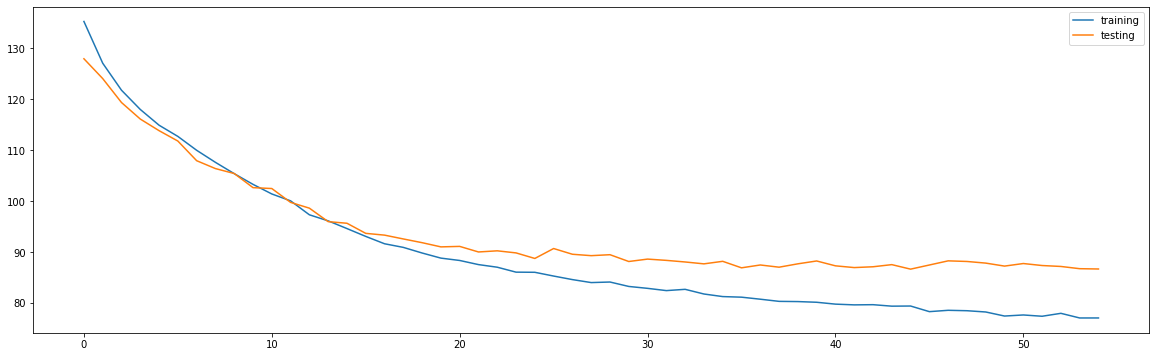

In [18]:
plot_loss_history(hist)

In [5]:
samples = pd.read_csv('FirstOut.csv').values

In [15]:
samples

array([[  0, 100, 100, 100, 100,   0, 100,  19, 100,   0,  24, 100,  19,
        100,   0,  19, 100,   0,  19, 100,   0,   0, 100,  19, 100, 100,
         19, 100,   0,   0,   0,  19,   0,   0,  19, 100,   0, 100, 100,
         19, 100,   0,  19, 100,  19,   0, 100,  19, 100,   0,  19, 100,
         24,   0, 100,  19, 100,  24,  19, 100,   0, 100,   0,  19],
       [  0,   0, 100,  24, 100,  19,   0,  24,  24,  19,   0,   0,  19,
        100,  24,  24,  19,  24,   0,  24,   0,   0,   0,  19,   0,  19,
        100, 100,   0,   0,   0,  24,   0,  19, 100,  19,   0,  19,   0,
         19,   0,  24,   0, 100,   0, 100, 100,  19,  24,  19,   0, 100,
         24,  19,   0,  19,   0,  24,   0,   0,   0, 100, 100,  24],
       [  0,  24,   0,   0,   0, 100, 100,  24, 100,   0,  24, 100,  19,
          0, 100,  19, 100, 100,  24, 100,  24,   0,   0,  19, 100,  24,
         24, 100,   0,   0, 100,   0, 100, 100,  19, 100, 100, 100, 100,
         19,   0,   0,   0,   0,  19,   0, 100,  24, 100,  

In [6]:
samples = cnn_vae.sample(10)

samples

NameError: name 'cnn_vae' is not defined

In [20]:
save_nn_output_to_midi(samples, name, **{'BPM':125, 'N_qb': 8, 'frame_factor': 8})

In [45]:
from keras_models.vae.variationalautoencoders import CNNEncoderDenseDecoder

encoder_filter_sizes = (128, 64, 32, 16)
encoder_dilation_rates = 1
latent_dim = 32
decoder_intermediate_dims = encoder_filter_sizes[::-1]

cnn_dense_vae = CNNEncoderDenseDecoder(encoder_filter_sizes, latent_dim, decoder_intermediate_dims, timesteps, vocab_size, embed_size=32)

In [46]:
name = f"{cnn_dense_vae.encoder.name}_{cnn_dense_vae.decoder.name}_{now()}"
learning_rate = 5e-3
epochs = 50
batch_size = 32

In [47]:
mc = ModelCheckpoint(f'keras_weights/{name}.h5', monitor='val_loss')
es = EarlyStopping(patience=10, restore_best_weights=True)

optimizer = Adam(learning_rate=learning_rate)

In [48]:
cnn_dense_vae.compile(optimizer=optimizer)

In [50]:
hist = cnn_dense_vae.fit(X_train, X_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_test, X_test),
                callbacks=[mc, es]
                  )

Epoch 1/50
111/111 [==============================] - 1s 10ms/step - loss: 77.5294 - reconstruction_loss: 75.3512 - kl_loss: 3.2941 - val_loss: 86.8447 - val_reconstruction_loss: 83.5869 - val_kl_loss: 3.2578
Epoch 2/50
111/111 [==============================] - 1s 8ms/step - loss: 77.2322 - reconstruction_loss: 75.0413 - kl_loss: 3.3191 - val_loss: 86.8128 - val_reconstruction_loss: 83.5393 - val_kl_loss: 3.2735
Epoch 3/50
111/111 [==============================] - 1s 7ms/step - loss: 78.3786 - reconstruction_loss: 75.0661 - kl_loss: 3.3408 - val_loss: 86.3398 - val_reconstruction_loss: 83.0130 - val_kl_loss: 3.3268
Epoch 4/50
111/111 [==============================] - 1s 7ms/step - loss: 77.4726 - reconstruction_loss: 74.4860 - kl_loss: 3.3794 - val_loss: 86.4708 - val_reconstruction_loss: 83.1370 - val_kl_loss: 3.3338
Epoch 5/50
111/111 [==============================] - 1s 6ms/step - loss: 76.9498 - reconstruction_loss: 74.3294 - kl_loss: 3.4104 - val_loss: 87.7626 - val_reconstruc

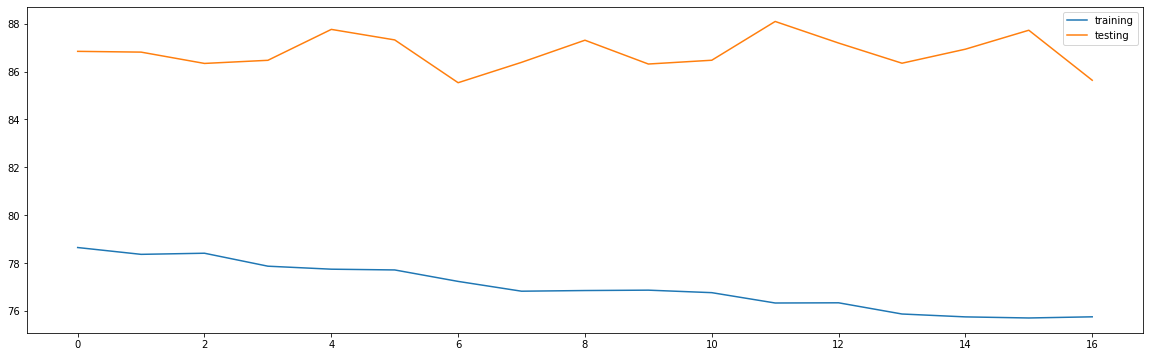

In [51]:
plot_loss_history(hist)

In [52]:
samples = cnn_dense_vae.sample(10)

samples

array([[ 0, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,  4],
       [ 0, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 14, 25, 25, 25, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 14,  0, 25,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 12],
       [ 0, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
         0, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
       [ 0, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,  0, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 2

In [38]:
from keras_models.wavenet import WaveNET

In [39]:
filter_sizes = (16, 17, 18, 19, 20, 21)

wnet = WaveNET(filter_sizes, vocab_size)

In [40]:
name = f"{wnet.name}_{now()}"
learning_rate = 5e-3
epochs = 50
batch_size = 32

In [41]:
mc = ModelCheckpoint(f'keras_weights/{name}.h5', monitor='val_loss')
es = EarlyStopping(patience=10, restore_best_weights=True)

optimizer = Adam(learning_rate=learning_rate)

In [42]:
wnet.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy')

In [45]:
hist = wnet.fit(x=np.concatenate((X_train[:,-1:], X_train[:,:-1]), axis=1), y=X_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(np.concatenate((X_test[:,-1:], X_test[:,:-1]), axis=1), X_test),
                callbacks=[mc, es]
                  )

Epoch 1/50
111/111 [==============================] - 1s 12ms/step - loss: 0.4542 - val_loss: 0.1369
Epoch 2/50
111/111 [==============================] - 1s 6ms/step - loss: 0.0712 - val_loss: 0.0461
Epoch 3/50
111/111 [==============================] - 1s 6ms/step - loss: 0.0415 - val_loss: 0.0390
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.0393 - val_loss: 0.0395
Epoch 5/50
111/111 [==============================] - 1s 5ms/step - loss: 0.0387 - val_loss: 0.0375
Epoch 6/50
111/111 [==============================] - 1s 6ms/step - loss: 0.0387 - val_loss: 0.0386
Epoch 7/50
111/111 [==============================] - 1s 6ms/step - loss: 0.0383 - val_loss: 0.0375
Epoch 8/50
111/111 [==============================] - 1s 6ms/step - loss: 0.0379 - val_loss: 0.0380
Epoch 9/50
111/111 [==============================] - 1s 6ms/step - loss: 0.0378 - val_loss: 0.0366
Epoch 10/50
111/111 [==============================] - 1s 5ms/step - loss: 0.0377 - val_loss: 0.036

In [46]:
out = wnet(np.concatenate((X_train[:,-1:], X_train[:,:-1]), axis=1)).numpy()

In [50]:
out.shape

(3536, 64, 26)

In [57]:
from sklearn.metrics import accuracy_score
from preprocessing import one_hot_encode

accuracy_score(X_train.reshape(-1), out.argmax(-1).reshape(-1))

0.9903006575226244

In [52]:
X_train.shape

(3536, 64)